In [1]:
pwd

'C:\\Users\\MS\\Documents\\github\\python\\practice'

In [55]:
import pandas as pd
path = './data/FileIO/'
f1 = 'Product_ERP.xlsx'
f2 = 'Product_SFDC.xlsx'

df1 = pd.read_excel(path+f1)
df2 = pd.read_excel(path+f2)
df1['Item'] = df1['Item'].astype(str)
df2['Item'] = df2['Item'].astype(str)
df1.sort_values(by='Item',ascending=True,inplace=True)
df2.sort_values(by='Item',ascending=True,inplace=True)

df3 = df1[['Item','Description','List Price']].merge(df2[['Item','List Price KRW']],on='Item',how='left')
#df3.head()
df3.to_excel(path+'Product_Compare.xlsx',index=False)

In [59]:
import pandas as pd
import numpy as np

path = './data/FileIO/'
f1 = 'Product_ERP.xlsx'
f2 = 'Product_SFDC.xlsx'

df1 = pd.read_excel(path+f1)
df2 = pd.read_excel(path+f2)
df1['Item'] = df1['Item'].astype(str)
df2['Item'] = df2['Item'].astype(str)
df1.sort_values(by='Item',ascending=True,inplace=True)
df2.sort_values(by='Item',ascending=True,inplace=True)

df3 = df1[['Item','Description','List Price']].merge(df2[['Item','List Price KRW']],on='Item',how='left')
df3.insert(4,'Compare',np.nan)

writer = pd.ExcelWriter(path+'Formula.xlsx', engine='xlsxwriter')
df3.to_excel(writer, sheet_name='Sheet1', index=False)
#workbook  = writer.book
worksheet = writer.sheets['Sheet1']

# Create a for loop to start writing the formulas to each row
for row in range(2,df3.shape[0]+2):
    formula = f'=if(C{row}=D{row},"OK","ERROR")'
    worksheet.write_formula(f'E{row}', formula)

writer.save()
writer.close()

In [3]:
import os
os.getcwd()

'/Users/usns/github/python/practice'

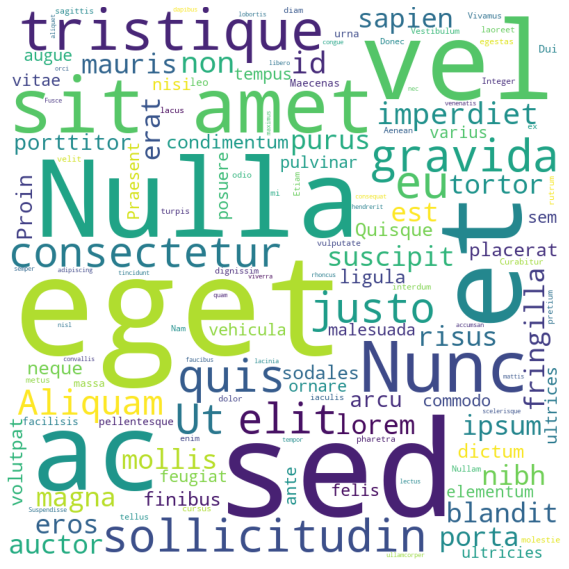

In [9]:
# Word Cloud 1
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
import re
import collections

file_content = open('../../Data/LoremIpsum.txt', encoding="utf-8").read()
spwords = set(STOPWORDS)
spwords.add('efficitur')

wc = WordCloud(max_font_size=200, stopwords=spwords, background_color='white', width=800, height=800)
wc.generate(file_content)

plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
#plt.show()    # To save the image, show() should follow savefig()
plt.savefig('../../Data/LoremIpsum.png')
plt.show()

In [20]:
import re
str1 = 'The Regular Expresion !!! 123 @#! 한글'

pattern1 = re.compile('[a-z0-9]+')
print(pattern1.findall(str1))

str2 = '098765-1234567'
pat2 = '-[0-9]{7}'
print(re.sub(pat2,'-*******',str2))

['he', 'egular', 'xpresion', '123']
098765-*******


In [18]:
string = """Ross McFluff: 834.345.1254 155 Elm Street 
Ronald Heathmore: 892.345.3428 436 Finley Avenue 
Frank Burger: 925.541.7625 662 South Dogwood Way 
Heather Albrecht: 548.326.4584 919 Park Place""" 

entries = re.split("\n+", string)
print (entries) 
print ()
result = [re.split(":? ", entry, maxsplit=4) for entry in entries] 
print (result)

['Ross McFluff: 834.345.1254 155 Elm Street ', 'Ronald Heathmore: 892.345.3428 436 Finley Avenue ', 'Frank Burger: 925.541.7625 662 South Dogwood Way ', 'Heather Albrecht: 548.326.4584 919 Park Place']

[['Ross', 'McFluff', '834.345.1254', '155', 'Elm Street '], ['Ronald', 'Heathmore', '892.345.3428', '436', 'Finley Avenue '], ['Frank', 'Burger', '925.541.7625', '662', 'South Dogwood Way '], ['Heather', 'Albrecht', '548.326.4584', '919', 'Park Place']]


In [22]:
?matplotlib

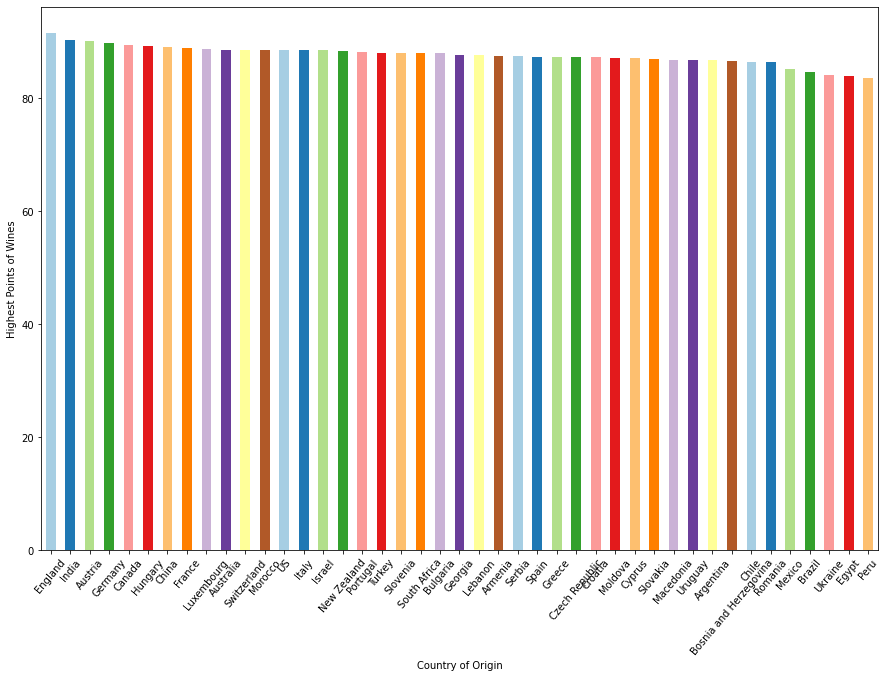

In [63]:
# Source : https://www.datacamp.com/community/tutorials/wordcloud-python?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377086&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1009871&gclid=CjwKCAiAvriMBhAuEiwA8Cs5lU_yhyuyLxpiQEa6ALe0Wc7cMrw6JmM_e5wDlzQ6M3Tqz08NGhj5vRoCjV8QAvD_BwE

import numpy as np
import pandas as pd
from os import path
#from PIL import image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# PWD : '/Users/usns/github/python/practice'
df = pd.read_csv('../../Data/winemag-data-130k-v2.csv', encoding ='utf-8', index_col=0)
#df.head()
country = df.groupby('country')
#country.describe().head()
plt.figure(figsize=(15,10))
colors = sns.color_palette('Paired')
#country.size().sort_values(ascending=False).plot.bar(color=colors)
# As in the source, if max() is used, ERROR. so mean() is used. 
country.mean().sort_values(by='points',ascending=False)['points'].plot.bar(color=colors)
plt.xticks(rotation=50)
plt.xlabel('Country of Origin')
plt.ylabel('Highest Points of Wines')
plt.show()

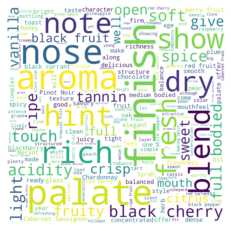

In [72]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../../Data/winemag-data-130k-v2.csv', encoding ='utf-8', index_col=0)
text = df.description[0]
text = ''.join(review for review in df.description)
#print('{} words in the review'.format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(['drink','now','wine','flavor','flavors'])
wc = WordCloud(stopwords=stopwords, max_font_size=150, max_words=200, background_color='white', width=800, height=800)
wc.generate(text)
plt.figure()
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()


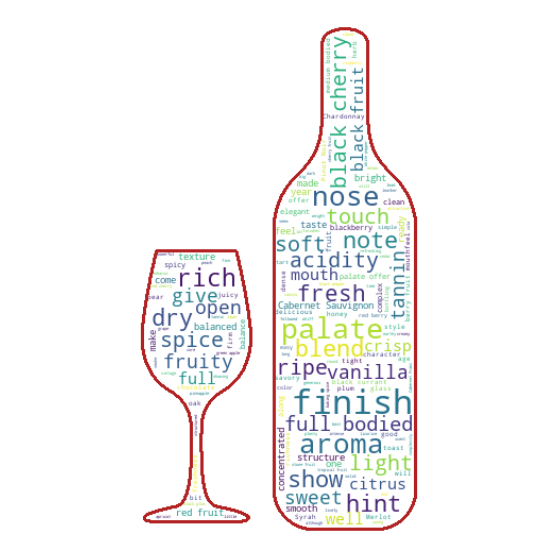

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wine_mask = np.array(Image.open('../../Data/wine_mask.png'))
df = pd.read_csv('../../Data/winemag-data-130k-v2.csv', encoding ='utf-8', index_col=0)

text = df.description[0]
text = ''.join(review for review in df.description)
stopwords = set(STOPWORDS)
stopwords.update(['drink','now','wine','flavor','flavors'])

def form_trans(val):
    if val == 0:
        return 255
    else:
        return val
    
wine_mask_trans = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    wine_mask_trans[i] = list(map(form_trans, wine_mask[i]))

wc = WordCloud(background_color='white', max_words=1000, mask=wine_mask_trans, stopwords=stopwords, 
              contour_width=3, contour_color='firebrick')
wc.generate(text)
wc.to_file('../../Data/wine.png')

plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
#plt.savefig('../../Data/wine.png')
plt.show()

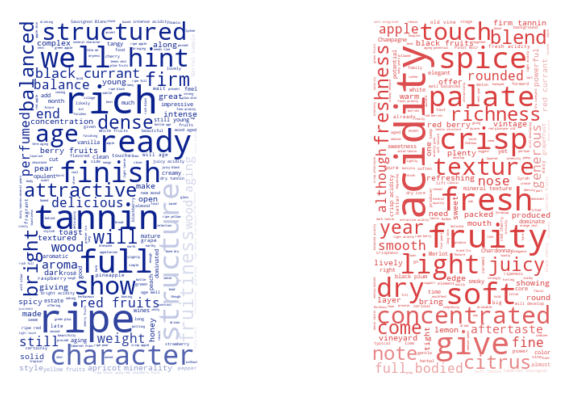

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

df = pd.read_csv('../../Data/winemag-data-130k-v2.csv', encoding ='utf-8', index_col=0)
txt_fr = ''.join(review for review in df[df['country']=='France'].description)
stopwords = set(STOPWORDS)
stopwords.update(['drink','now','wine','flavor','flavors','fruit'])

mask = np.array(Image.open('../../Data/france.png'))
wc = WordCloud(background_color='white', max_words=1000, mask=mask, stopwords=stopwords, mode='RGBA')
wc.generate(txt_fr)
                
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.savefig('../../Data/fr_wine.png')
plt.show()